In [22]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib notebook

# Encoding of nominal variables to numerical variables
Let's create a random set of 100 events that took place in one of three cities. The resulting data is one nominal variables with three entries. If we want to compute things with this, often it is useful to convert that nominal data into a number. 

Examples of this are one-hot encoding for text processing: 
* given a text, first you do the unigram of your dictionary and each word in the text is an index into that unigram array - let's say we find $n$ different words
* let's say, the current word we are looking at can be found at index $i$ in the unigram
* we can view this word in the text therefore as an $n$-dimensional vector, which is zero except for the $i$-th component (the one hot element in the otherwise cold vector!)

Why do we use this (rather blown-up) representation?

Many machine learning algorithms cannot handle nominal data natively and instead work better with feature vectors. Most trees as we have seen, however, can handle nominal data easily and hence, the one-hot encoding is NOT necessary. 

Incidentially, a variant of one-hot encodings called **dummy encoding** is also used in statistics to convert nominal (categorical) data into a format that can be handled in an easier way by statistics algorithms. Note, however, that they are **not** quite the same - the difference between these two types of encoding is especially tricky for regression models built on categorical data (we will not look into this here!)

https://en.wikiversity.org/wiki/Dummy_variable_(statistics)


In [23]:
# create a sample of unique values
randVal = np.random.randint(low=0,high=3,size=100)
randSeries = pandas.Series(randVal)
# create a mapping dictionary
mapper = {0: 'New York', 1: 'London', 2: 'Zurich'}
# convert the number data to text
nomvar = randSeries.replace(mapper)

# with pandas.get_dummies, we can do the encoding:
print(pandas.get_dummies(nomvar))

# with sklearn.LabelEncoder, we can do this, too:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# transform to numeric labels - note, we have to reshape this
# array since that is required by the next stage
labelEncoded = LabelEncoder().fit_transform(nomvar).reshape(-1,1)
# transform '2D' array to binary encoding
oneHotEncoded = OneHotEncoder().fit_transform(labelEncoded).toarray()
print(oneHotEncoded)



    London  New York  Zurich
0        0         1       0
1        0         0       1
2        0         1       0
3        0         0       1
4        0         1       0
5        0         0       1
6        1         0       0
7        0         0       1
8        0         0       1
9        1         0       0
10       0         0       1
11       0         0       1
12       0         0       1
13       0         0       1
14       0         1       0
15       0         1       0
16       0         1       0
17       0         1       0
18       0         0       1
19       0         0       1
20       0         1       0
21       0         1       0
22       0         0       1
23       0         1       0
24       0         0       1
25       0         1       0
26       0         1       0
27       0         1       0
28       0         1       0
29       1         0       0
..     ...       ...     ...
70       1         0       0
71       0         0       1
72       0    

In [25]:
nomvar

0     New York
1       Zurich
2     New York
3       Zurich
4     New York
5       Zurich
6       London
7       Zurich
8       Zurich
9       London
10      Zurich
11      Zurich
12      Zurich
13      Zurich
14    New York
15    New York
16    New York
17    New York
18      Zurich
19      Zurich
20    New York
21    New York
22      Zurich
23    New York
24      Zurich
25    New York
26    New York
27    New York
28    New York
29      London
        ...   
70      London
71      Zurich
72    New York
73      London
74    New York
75    New York
76    New York
77      London
78    New York
79      London
80      London
81      London
82      Zurich
83    New York
84      Zurich
85    New York
86      Zurich
87      London
88    New York
89      London
90      London
91    New York
92    New York
93      London
94      London
95      Zurich
96      London
97    New York
98    New York
99      Zurich
dtype: object

# Encoding of ordinal variables to numerical variables
We can repeat the same idea with ordinal variables, but here it will be important to preserve their ordering. Hence, the mapping algorithms from pandas will not do the job properly and we have to generate our own mapping. 

In [28]:
# create a sample of unique values
randVal = np.random.randint(low=0,high=3,size=100)
randSeries = pandas.Series(randVal)
# create a mapping dictionary, replacing values
mapper = {1: 'small', 2: 'medium', 0: 'large'}
ordvar = randSeries.replace(mapper)
# this yields a numeric representation of the "ordinal" array
pFact,pFactInd = pandas.factorize(ordvar)
# if we execute the code multiple times, we will see
# that pandas chooses the index randomly
# --> order is not preserved!
print(pFact,pFactInd)

[0 1 1 2 0 0 0 0 2 1 2 2 0 2 2 0 1 2 1 0 1 2 0 1 1 2 1 2 0 2 1 1 1 1 1 1 2
 2 1 2 1 1 0 1 2 2 1 1 1 0 2 0 0 1 0 2 0 1 0 1 1 1 1 0 0 2 0 2 1 0 2 2 1 1
 1 0 0 2 0 0 0 0 0 0 0 1 0 1 0 2 1 1 2 2 0 1 1 2 0 1] Index(['medium', 'large', 'small'], dtype='object')


So, this does not work. Let's do this ourselves:

In [29]:
# So, we basically do the same thing backwards

# choose our own mapping algorithm to go from 
# ordinal data values to numbers
preservingMapper = {'large':2 , 'medium': 1, 'small': 0}
# and convert array
ordvar.replace(preservingMapper)
# now we are fine
print(ordvar.replace(preservingMapper))

0     1
1     2
2     2
3     0
4     1
5     1
6     1
7     1
8     0
9     2
10    0
11    0
12    1
13    0
14    0
15    1
16    2
17    0
18    2
19    1
20    2
21    0
22    1
23    2
24    2
25    0
26    2
27    0
28    1
29    0
     ..
70    0
71    0
72    2
73    2
74    2
75    1
76    1
77    0
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    2
86    1
87    2
88    1
89    0
90    2
91    2
92    0
93    0
94    1
95    2
96    2
97    0
98    1
99    2
dtype: int64


# Quick view on numerical data
The file http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data contains data on concentrations of 13 different chemicals in wines grown in the same region in Italy that are derived from three different cultivations. Hence, for each wine we have 13 different numerical values, like this:

`1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065`
`1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050`
`...`

The first column is the wine type, and the following columns are the 13 features.

In [30]:
# read the data from the internets using pandas
data = pandas.read_csv(("http://archive.ics.uci.edu/ml/"
                        "machine-learning-databases/wine/wine.data"), header=None)

# rename column names to “V1” .. “V14”
data.columns=["V"+str(i) for i in range(1,len(data.columns)+1)]

# map the numbers to some nicer label
labelMapper = {1:'Label1', 2:'Label2', 3:'Label3'}
# and convert array (I have to reassign it!)
data.V1=data.V1.replace(labelMapper)

# print out subview of the data
# (note that slicing of pandas DataFrame data directly
# is done via the ".loc" property)
print(data.loc[0:10,"V1":"V5"])

# The first column contains the 3 labels 
# we call this the "dependent variable"
# Usually, some algorithm would try to 
# --- characterize the 13 different chemicals for
#     each of the 3 labels
# --- predict this label from the 13 different 
#     chemical dimensions in the remaining data
y = data.V1

# get all the chemical variables for each wine into X
X = data.loc[:, "V2":]


# to drive the point home that .loc indexing of DataFrames
# has inclusive indexing:
# this give us the first 11 rows
numpyArray=np.array(X.loc[0:10,"V2":"V5"])
# nope - we get only the first 10 rows!!
print(numpyArray[0:10,:])

        V1     V2    V3    V4    V5
0   Label1  14.23  1.71  2.43  15.6
1   Label1  13.20  1.78  2.14  11.2
2   Label1  13.16  2.36  2.67  18.6
3   Label1  14.37  1.95  2.50  16.8
4   Label1  13.24  2.59  2.87  21.0
5   Label1  14.20  1.76  2.45  15.2
6   Label1  14.39  1.87  2.45  14.6
7   Label1  14.06  2.15  2.61  17.6
8   Label1  14.83  1.64  2.17  14.0
9   Label1  13.86  1.35  2.27  16.0
10  Label1  14.10  2.16  2.30  18.0
[[ 14.23   1.71   2.43  15.6 ]
 [ 13.2    1.78   2.14  11.2 ]
 [ 13.16   2.36   2.67  18.6 ]
 [ 14.37   1.95   2.5   16.8 ]
 [ 13.24   2.59   2.87  21.  ]
 [ 14.2    1.76   2.45  15.2 ]
 [ 14.39   1.87   2.45  14.6 ]
 [ 14.06   2.15   2.61  17.6 ]
 [ 14.83   1.64   2.17  14.  ]
 [ 13.86   1.35   2.27  16.  ]]


<IPython.core.display.Javascript object>


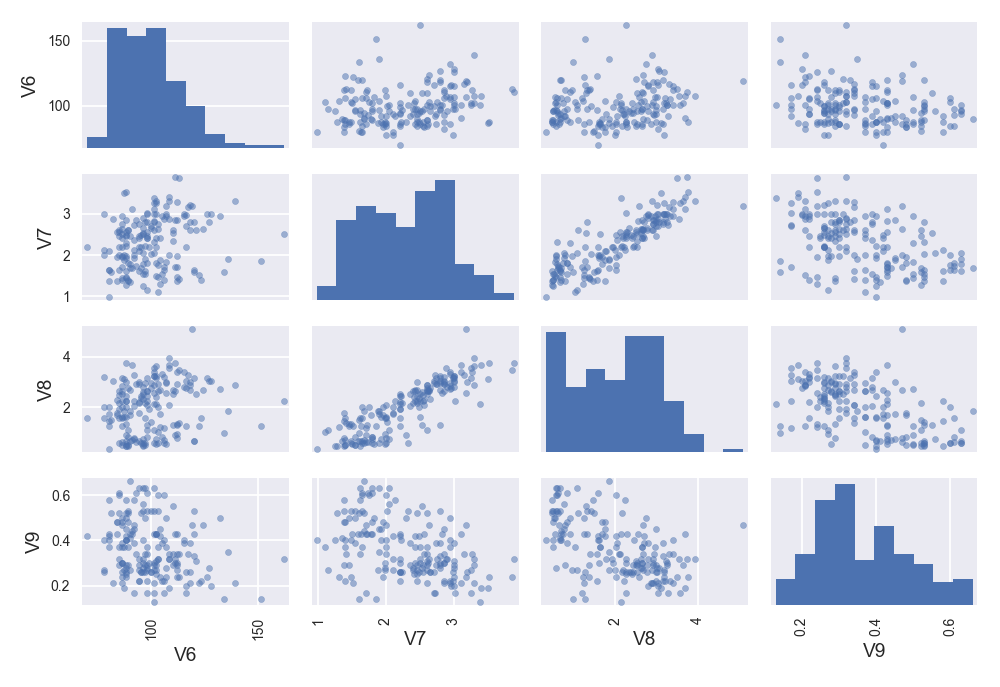

In [32]:
# now let's take a look at the data using a scatter 
# matrix plot across the first 4 data dimensions
pandas.tools.plotting.scatter_matrix(data.loc[:,"V6":"V9"],diagonal="hist")
plt.tight_layout()
plt.show()

## Observations
* We can see that the histograms (on the diagonal) for some values are decidedly skewed and hence we should be careful about some statistical statements (such as all those having to do with Gaussian/normal assumptions!)
* It looks like there are some correlations in that data. For example, V4 versus V5. 

Given our look at the data, let's plot the correlation for V4 versus V5

<IPython.core.display.Javascript object>


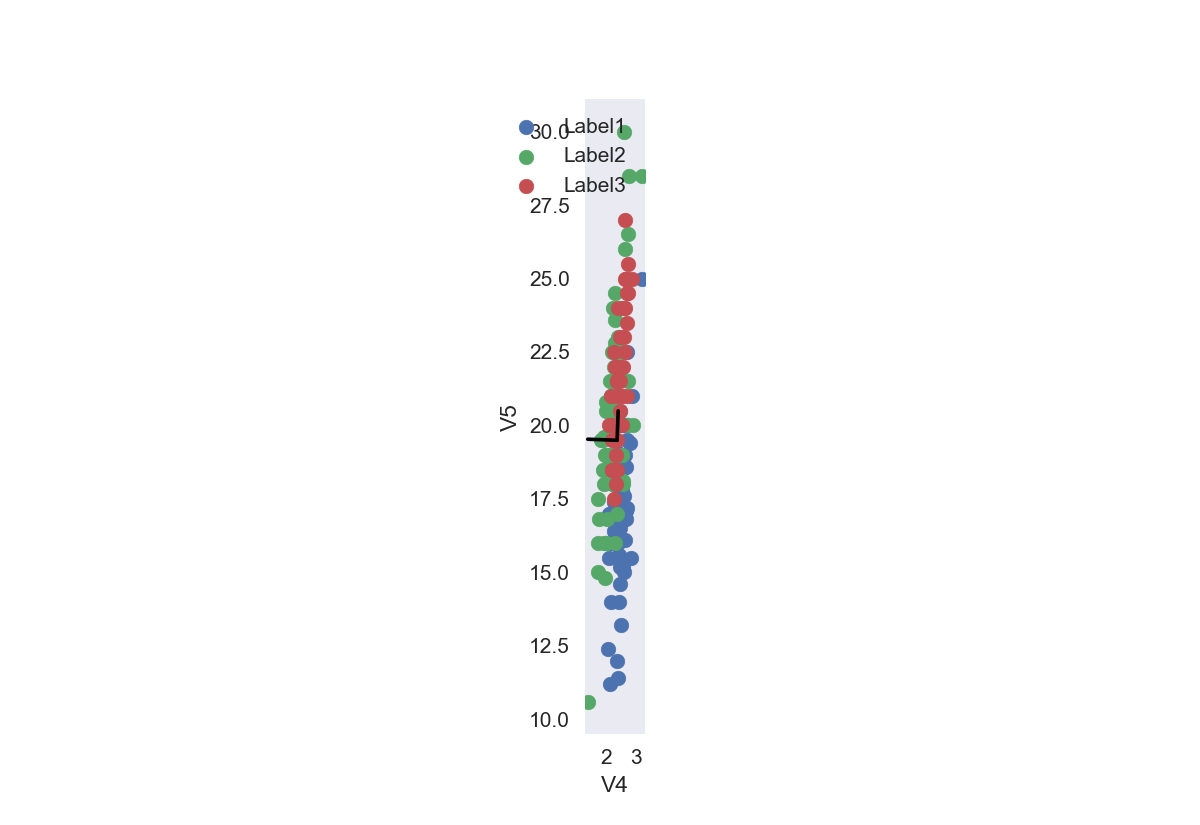

In [37]:
plt.figure()
ax = plt.gca()
# this makes sure that the axes are drawn BELOW the data
ax.set_axisbelow(True)
plt.grid()
# loop through all labels
for i in np.unique(data.loc[:,"V1"]):
    # find out index belonging to each label
    index=data.loc[:,"V1"]==i
    # scatter this
    plt.scatter(data.loc[index,"V4"],data.loc[index,"V5"],label=i)
plt.xlabel('V4')
plt.ylabel('V5')
plt.legend(loc='best')
plt.show()

## Observations
* there is a clear correlation between the two chemicals
* there may be some discriminative power for the three labels going from the bottom right to the top left

In [38]:
ann = plt.annotate('discriminative\ndirection?',xy=(2,27.5),xytext=(2.75,12.5),arrowprops=dict(arrowstyle='->'))

## PCA
Could we try to get these directions (the correlation direction and the discriminative direction) from the data? 

Principal Component Analysis to the rescue. The two eigenvectors of PCA exactly describe these two directions for us.

As a reminder: PCA rotates the original data coordinates such that the new axes point in the direction of maximum variances. The new axes are orthogonal.

In [39]:
from sklearn.decomposition import PCA
# get data
pcaData = np.array(X.loc[:,"V4":"V5"])
pcaDataM = pcaData.mean(axis=0)
pcaDataS = pcaData.std(axis=0)
# standardize the data
pcaDataStd = (pcaData-pcaDataM)
# construct the method
pca = PCA()
# fit the method to the data
pca.fit(pcaDataStd)
# now the pca contains the results from
# which we want the "components_" data
vec1 = pca.components_[0]+pcaDataM
vec2 = pca.components_[1]+pcaDataM
plt.plot([pcaDataM[0],vec1[0]],[pcaDataM[1],vec1[1]],'k')
plt.plot([pcaDataM[0],vec2[0]],[pcaDataM[1],vec2[1]],'k')

Wait a second! These do **not** seem orthogonal! What happened?

Let's re-adjust the aspect ratio properly and check that the two components are indeed orthogonal!

In [40]:
ax = plt.gca()
ann.remove()
ax.set_aspect('equal')
print('The dot product between the two components (should be 0) is: ',np.dot(pca.components_[0],pca.components_[1]))

The dot product between the two components (should be 0) is:  0.0


# Seaborn
Python has an abundance of helper packages for visualization, plotting, data analysis, etc.

One particularly nice one is seaborn which is a higher-level interface for matplotlib, allowing you to plot a few things in a "nicer" way.

You can install it as usual with `pip3 install seaborn` and check some examples here:

https://seaborn.pydata.org/examples/index.html

To see how things are different compared to matplotlib, let's re-plot the scatter matrix of the wine-data with seaborn:

<IPython.core.display.Javascript object>


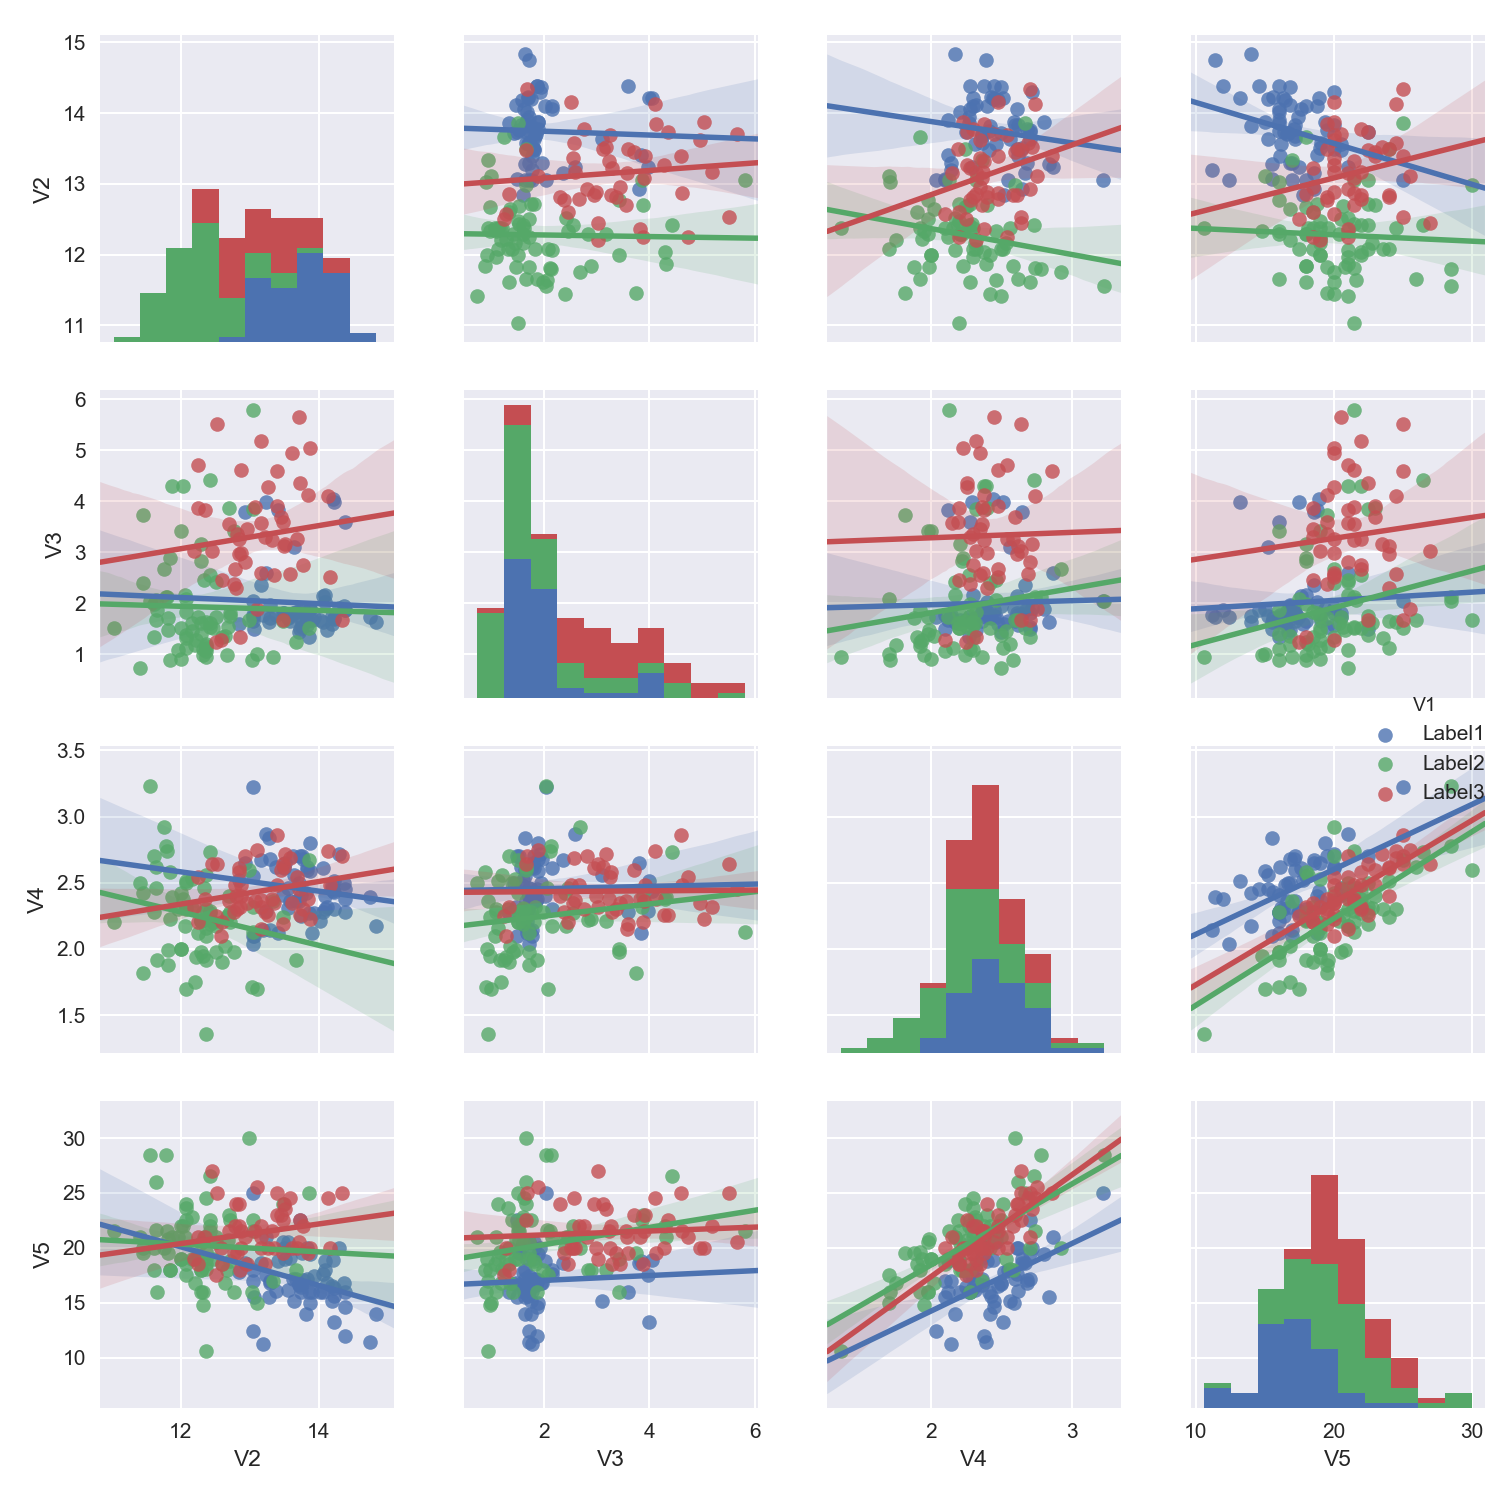

In [41]:
import seaborn as sb
sb.pairplot(data.loc[:,"V1":"V5"],hue="V1",kind="reg")
plt.show()

What seaborn shows here is:
* the cumulative histograms on the diagonal for each of the three labels
* the correlation scatter plots including standard, linear regression fits with confidence intervals

We can see that V4 versus V5 has the clearest correlations.

Let's look at the matrix of correlations:

<IPython.core.display.Javascript object>


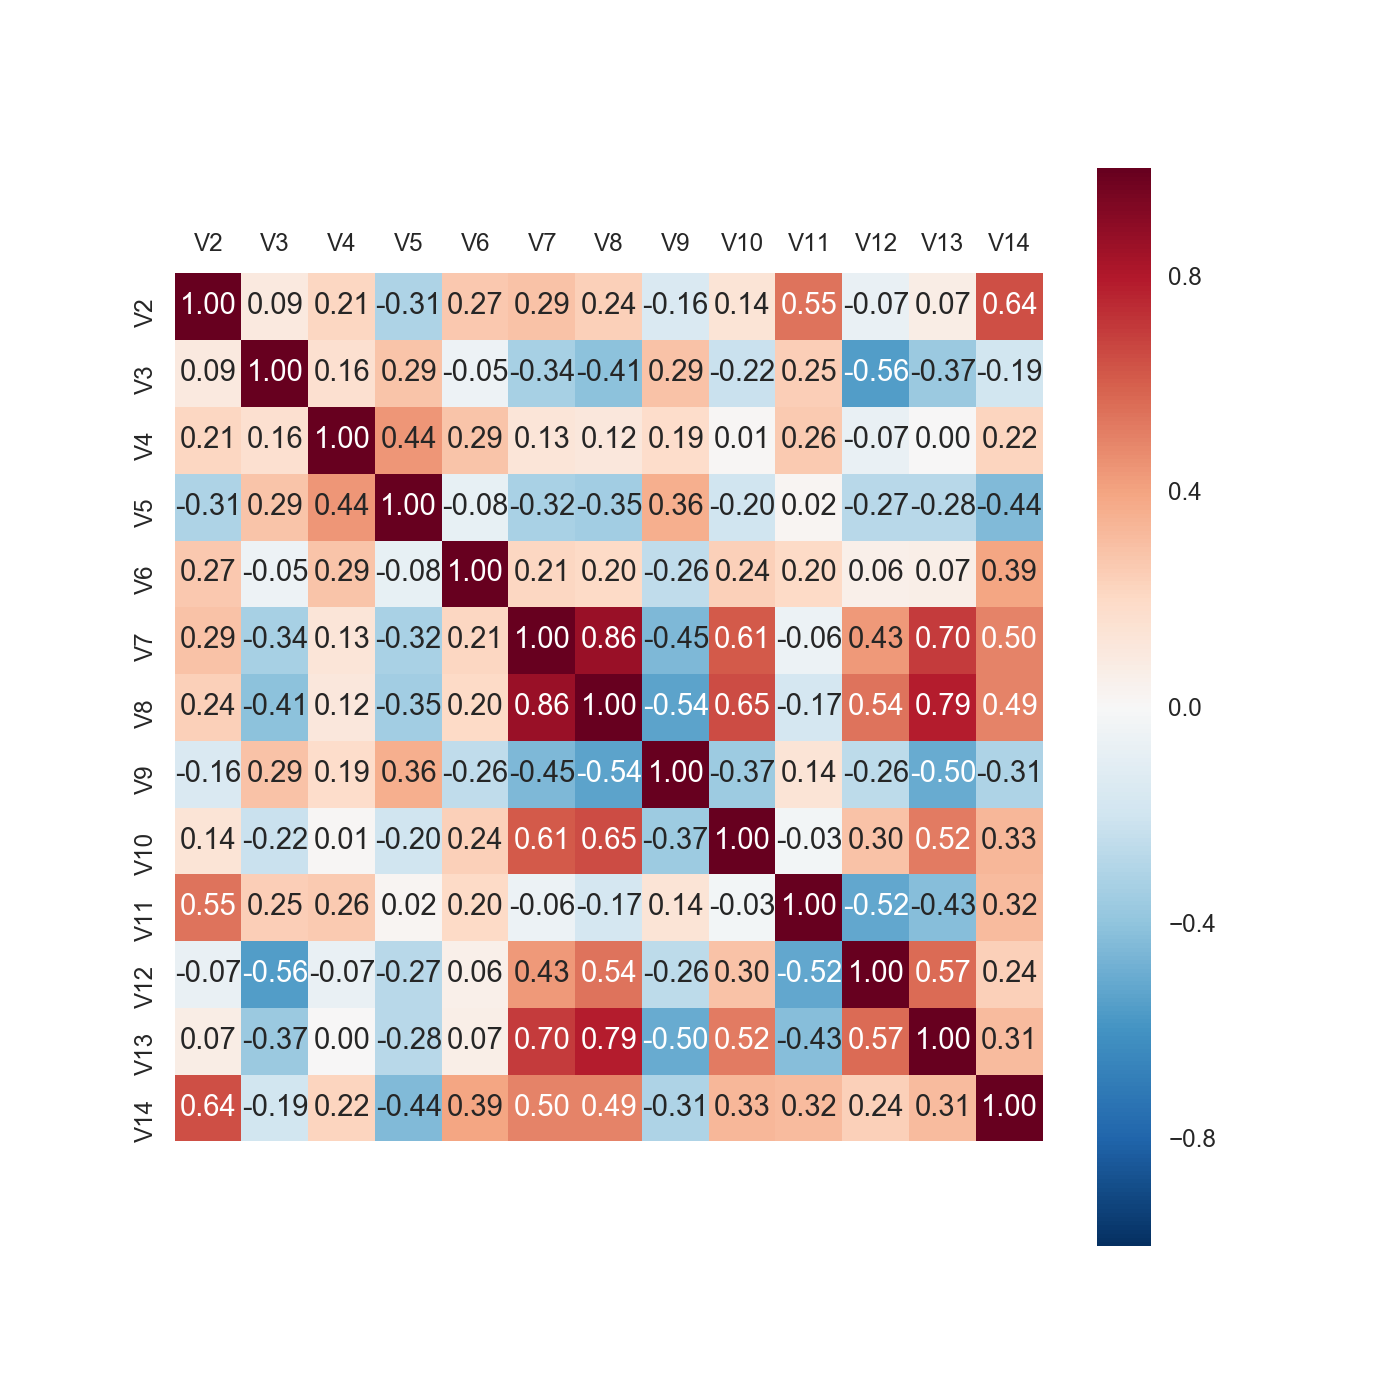

In [42]:
# pandas has a correlation helper function for DataFrames:
c = X.corr()
# and seaborn has a nice visualization:
fig, ax = plt.subplots(figsize=(8,8)) 
sb.heatmap(c, vmin=-1., vmax=1., square=True, annot=True, fmt='.2f', ax=ax).xaxis.tick_top()

Actually, we can see a lot of correlations in our dataset. For example, V4 with V5 "only" has 0.44, but V7 with V8 has 0.86. This means that the dataset has a lot of redundancies.

We can use the PCA algorithm from above to reduce the dimensionality of our dataset as follows: 

<IPython.core.display.Javascript object>


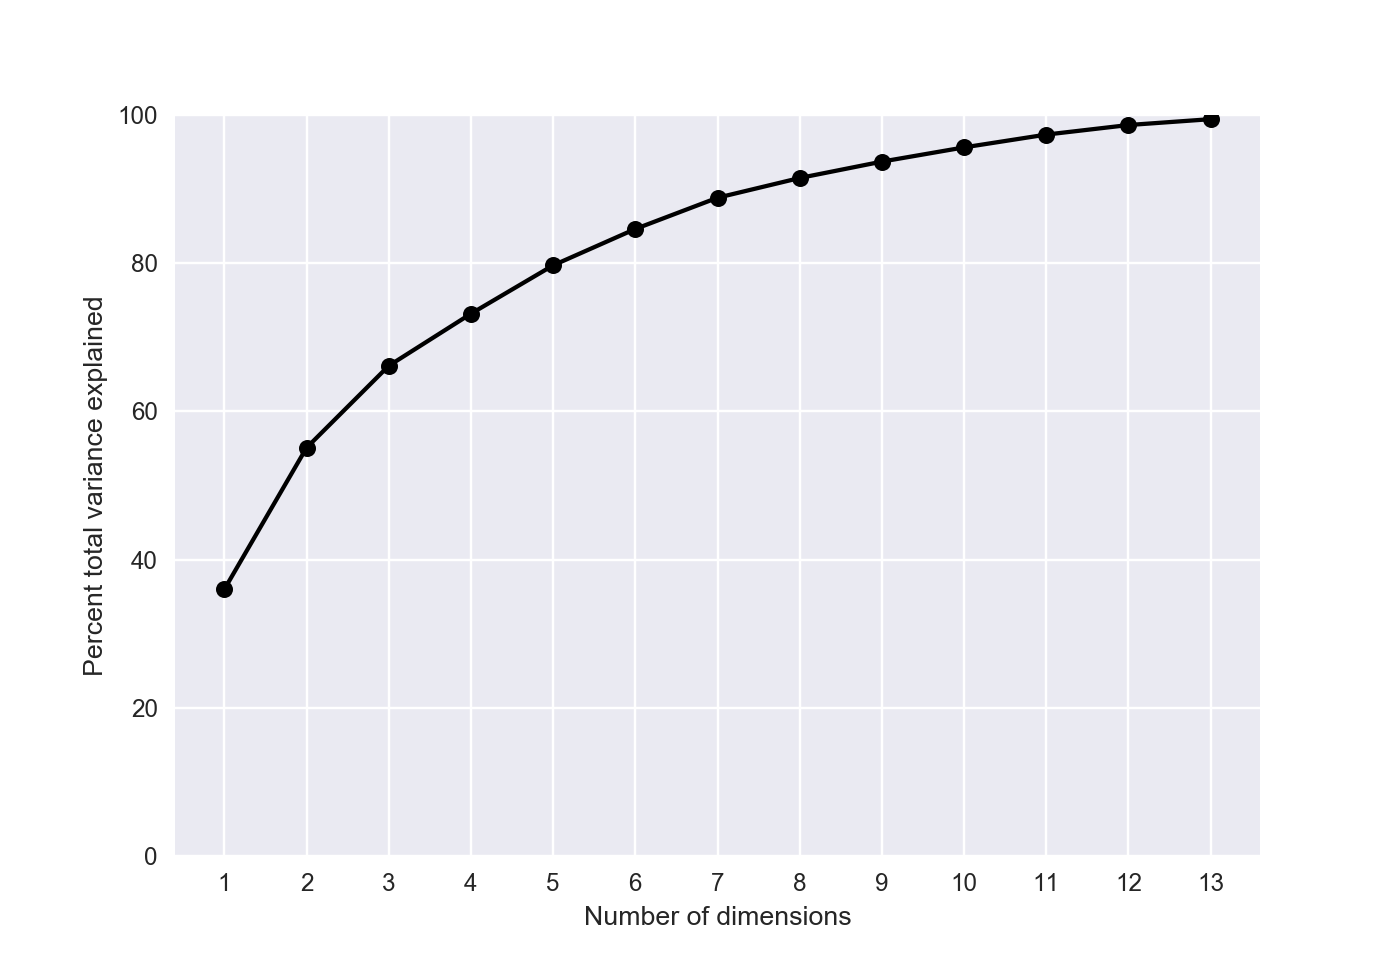

In [43]:
# standardize the data - this is necessary to avoid problems with
# different measurement scales!!
pcaDataStd = (X-X.mean())/X.std()
# construct PCA method
bigPCA = PCA()
# fit it to data using default parameters
bigPCA.fit(pcaDataStd)
# how many dimensions do we have 
numDims = len(bigPCA.explained_variance_)
plt.figure()
# plot the cumulative sum of the explained variance
plt.plot(np.arange(1,numDims+1),np.cumsum(bigPCA.explained_variance_)*100.0/numDims,'ko-')
plt.xticks(np.arange(1,numDims+1))
plt.ylim(0,100)
plt.xlabel('Number of dimensions')
plt.ylabel('Percent total variance explained')
plt.show()

There are multiple ways to decide now how many components to keep. With this plot, we can try to keep as many components so that we can still explain 80% of the variance. In this case, this would be 5 components.

We see that three components still explain around 64%, so we can try to plot all wines in this new 3D-coordinate system.

<IPython.core.display.Javascript object>


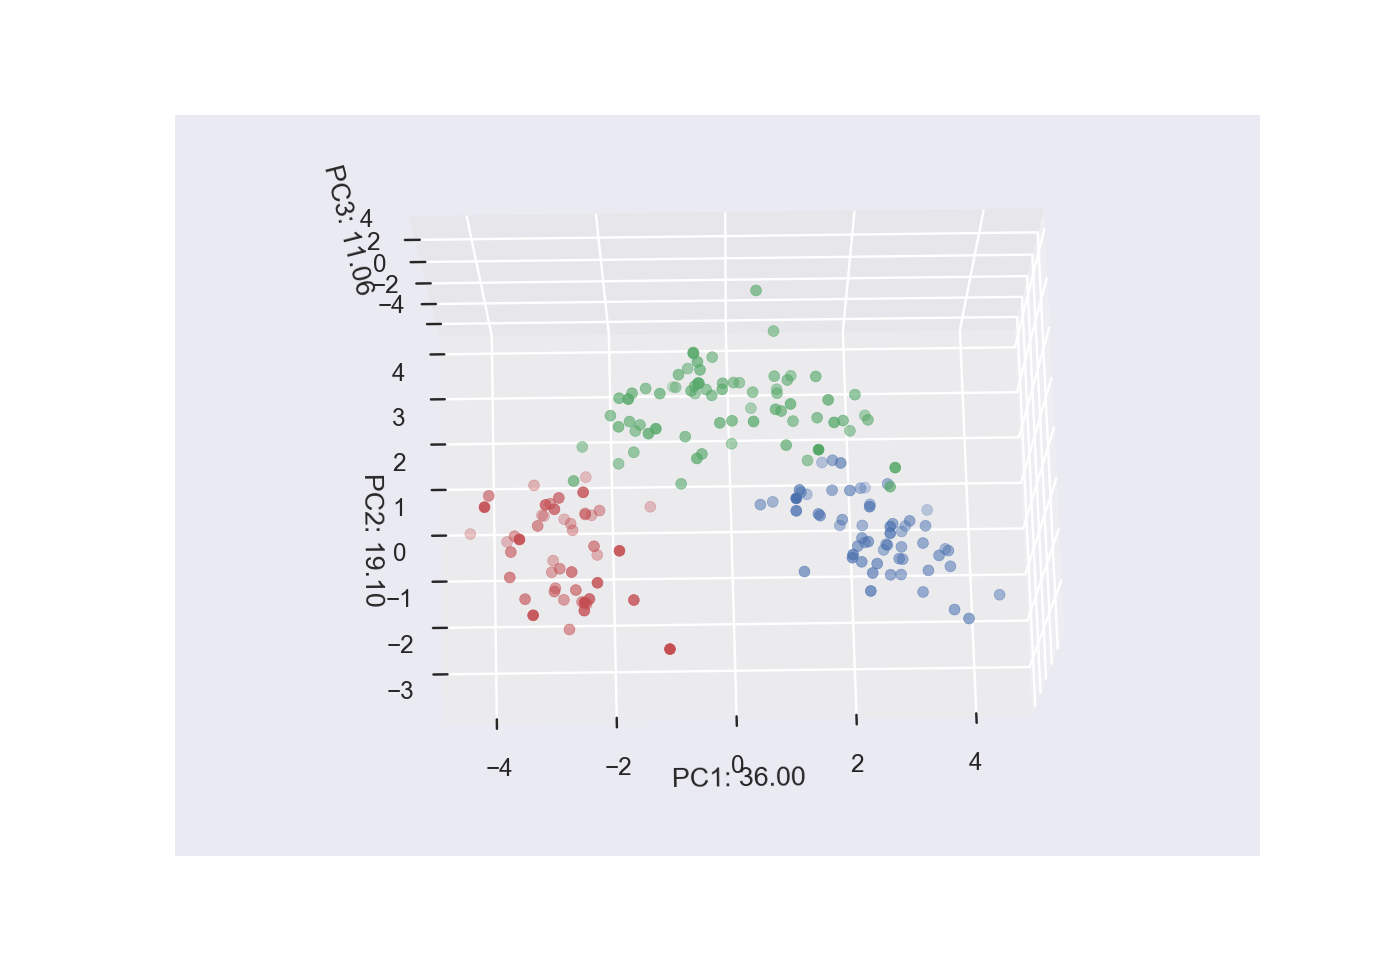

In [44]:
# for our 3D plots
from mpl_toolkits.mplot3d import Axes3D

# let's get the PCA coordinates of all points
# the .transform method takes data and projects
# it onto the PCA dimensions
# from the resulting projection, we will only
# keep the first three dimensions!
pcaProj = bigPCA.transform(pcaDataStd)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(data.loc[:,"V1"]):
    # find out index belonging to each label
    index=data.loc[:,"V1"]==i
    # scatter the first three dimensions of each wine-label
    ax.scatter(pcaProj[index,0],pcaProj[index,1],pcaProj[index,2],label=i)
ax.set_xlabel('PC1: {:.2f}'.format(bigPCA.explained_variance_[0]*100.0/numDims))
ax.set_ylabel('PC2: {:.2f}'.format(bigPCA.explained_variance_[1]*100.0/numDims))
ax.set_zlabel('PC3: {:.2f}'.format(bigPCA.explained_variance_[2]*100.0/numDims))
plt.show()


And, lo and behold, we can actually see a nice separation of the three wine types in this plot - in fact, most of the separability is done by the first and the second dimension.

We can therefore see how exploiting correlations can help to find patterns and perhaps aid in clustering as well!

# DIY - IRIS flowers

Now, let's go to the IRIS dataset and do our analysis here as well.

First, we load the IRIS dataset into memory from scikit (actually seaborn has that as well, but we will use scikit's version here) and convert it into a pandas DataFrame for use with seaborn.

The scikit IRIS version has several fields:

* iris.feature_names: a list of the four features along which Fisher measured the flowers
* iris.data: an array containing the values of the four features for each flower
* iris.target: an integer-coded array telling us which flower it is

In [ ]:
from sklearn import datasets
# load the IRIS dataset
iris = datasets.load_iris()

iris


So, now we want to stick that data into a pandas DataFrame and show the pairplot with seaborn similarly to the WINE example from above:

In [ ]:
# what are the names of the features?
fnames = iris...

# let's convert to pandas DataFrame and name
# the columns according to the feature names
data = pandas.DataFrame(iris...,columns=...)

# the DataFrame should also contain the target values
# so, we should add them here in a column named "Y"
# luckily, extending a dataFrame is easy in pandas:
data["Y"] = pandas.DataFrame(...)

# show the pairplot of all variables
# since seaborn by default plots all NUMERIC columns,
# it would plot the "Y"-column as well, so we need to
# pass the "vars" argument to restrict plotting to the
# feature columns only
sb.pairplot(...,vars=...,hue=...,kind="reg")
plt.show()


Now that we have loaded everything and checked that there are, indeed, some correlations, let's apply PCA to all the data to exploit those correlations. 

We can simply follow the recipe for the WINE data from above for doing these analyses:

In [ ]:
# construct PCA method
irisPCA = ...

# standardize our data (only the actual numeric data)
dataStd = ...

# fit PCA to data 
irisPCA.fit(...)

# now project data onto these dimensions:
dataTrans = irisPCA.transform(dataStd)

# now convert the result back into DataFrame for the first two dimensions
dataToPlot = pandas.DataFrame(...,columns=["Dim1","Dim2"])

# add the IRIS flowers
dataToPlot["Y"]=data["Y"]

# and plot the result using seaborn without regression
sb.lmplot(x="Dim1",y="Dim2",data=dataToPlot,hue="Y",fit_reg=False)
plt.show()
# we want to know how much variance we can explain - this is contained
# somewhere in irisPCA...
plt.title("Two dimensions explain {:.2f}% of variance".format(...))